In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation
from scipy import integrate
from scipy import optimize

Populating the interactive namespace from numpy and matplotlib


In [5]:
#Defining Fixed-point iteration function
def FixedPoint_Animation( f, pini, Nmax, xmin, xmax ):
    g = lambda x: x-f(x)
    #Initial condition
    pi = [pini,]
    px = [pini,pini,]
    py = [0,]
    #Iterations
    for n in arange(Nmax+3):
        pi.append( g(pi[n]) )
        px.append( g(pi[n]) )
        px.append( g(pi[n]) )
        py.append( g(pi[n]) )
        py.append( g(pi[n]) )
    
    py.append( g(pi[n+1]) )
    pi = np.array( pi )
    px = np.array( px )
    py = np.array( py )
    
    print( "Result:", pi[-1])
    
    #Array X-axis
    X = np.linspace(xmin,xmax,100)
    
    #Initializing Figure
    fig = plt.figure( figsize=(7,7) )
    ax = fig.add_subplot(111)
    #Graphic iterations
    fixedpoint, = ax.plot( [], [], color="red", linewidth = 3 )
    #Function g
    ax.plot( X, g(X), color="green", linewidth = 2 )
    #Identity funcion
    ax.plot( X, X, color="blue", linewidth = 2 )
    ax.grid(True)
    ax.set_xlim( (xmin, xmax) )
    ax.set_ylim( (xmin, xmax) )
    ax.set_xlabel( "X axis" )
    ax.set_ylabel( "Y axis" )
    ax.set_title( "Fixed-Point iteration" )
        
    def init():
        fixedpoint.set_data([], [])
        return fixedpoint,
    
    def animate(i):
        #Setting new data
        fixedpoint.set_data( px[:2*i], py[:2*i] )
        ax.set_title( "Fixed-Point. Iteration %d"%i )
        return fixedpoint,
    
    return animation.FuncAnimation(fig, animate, init_func=init,frames=Nmax, interval=500, blit=True)

Result: 0.9999999890733635



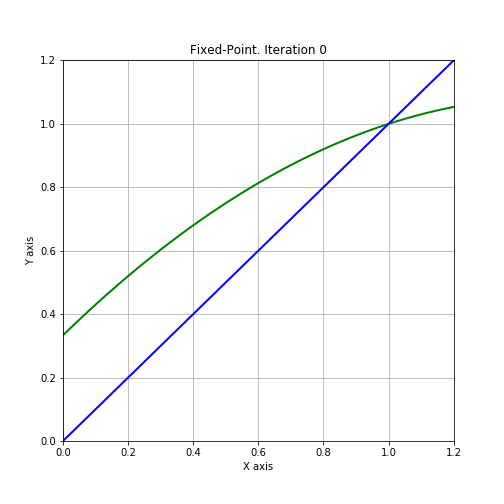
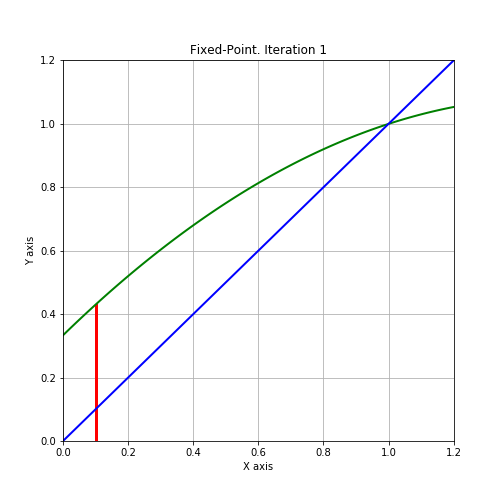
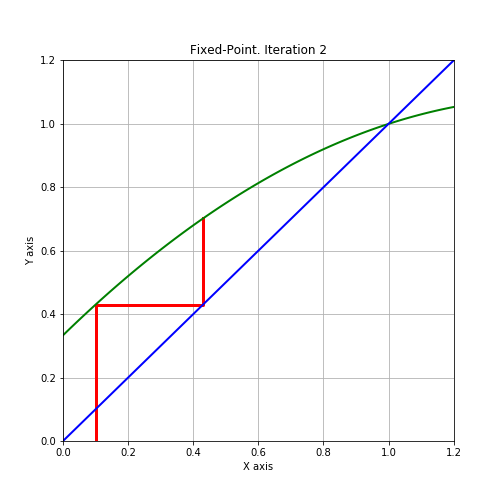
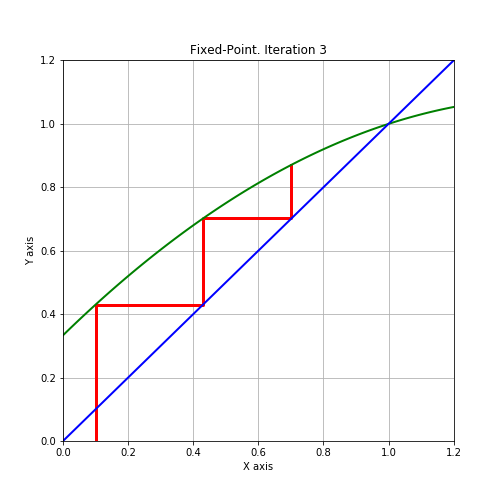
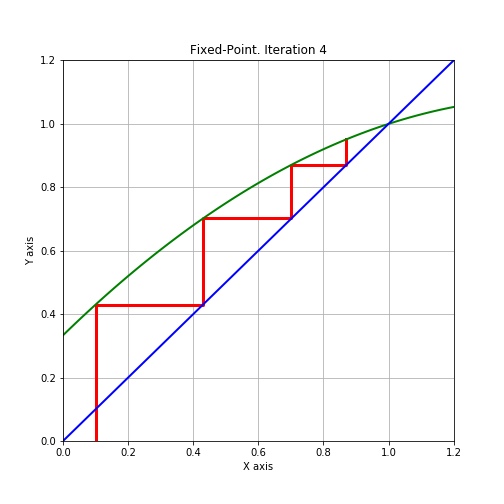
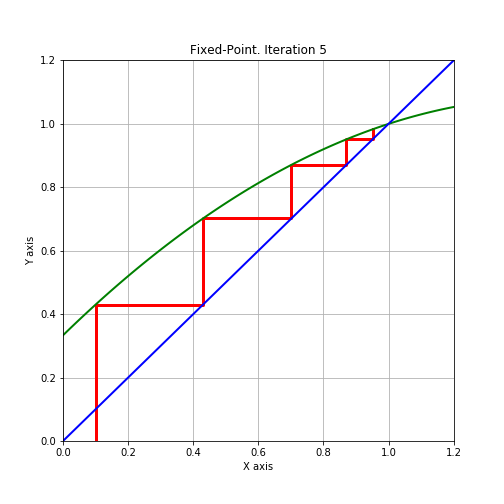
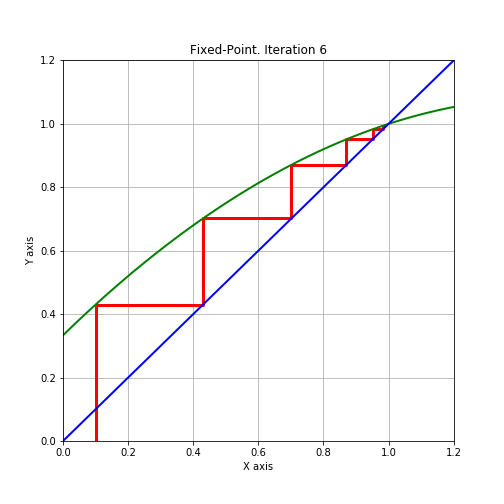
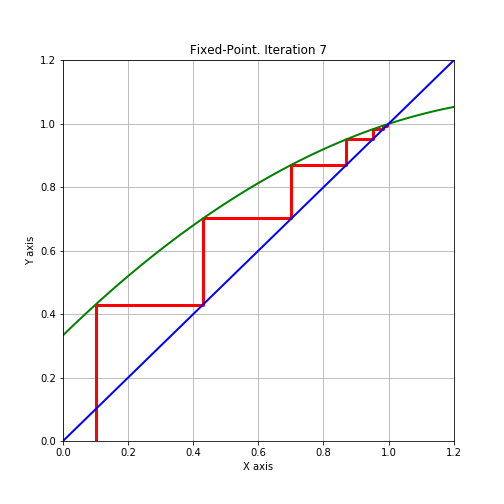
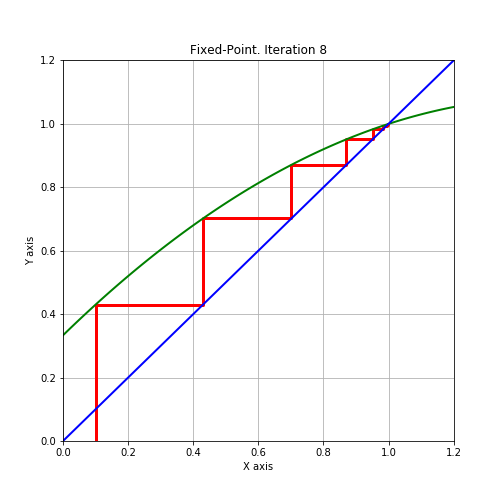
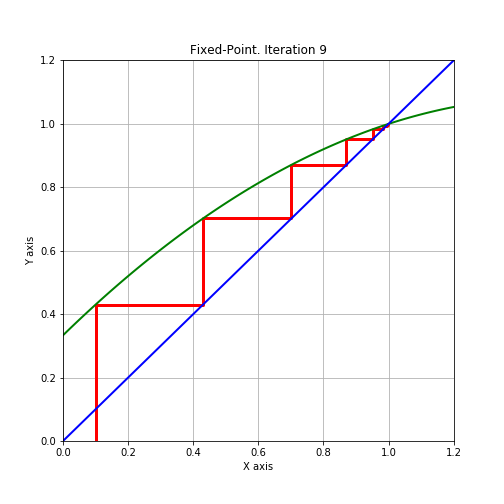
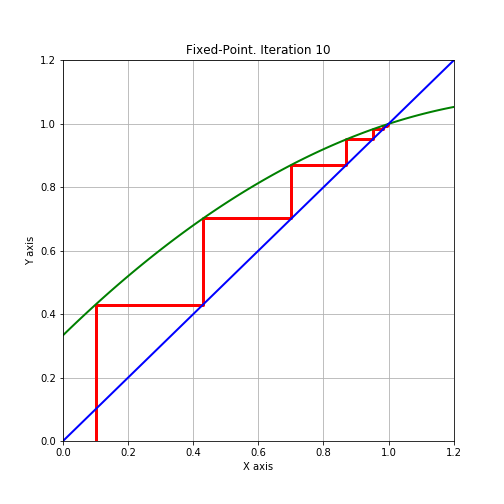
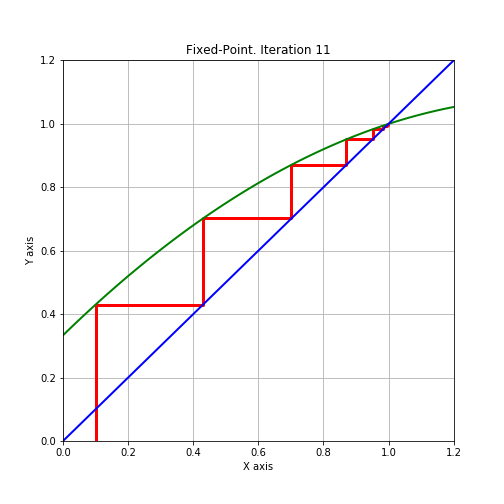
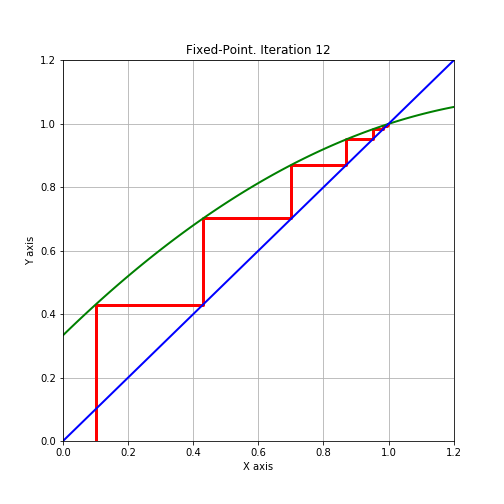
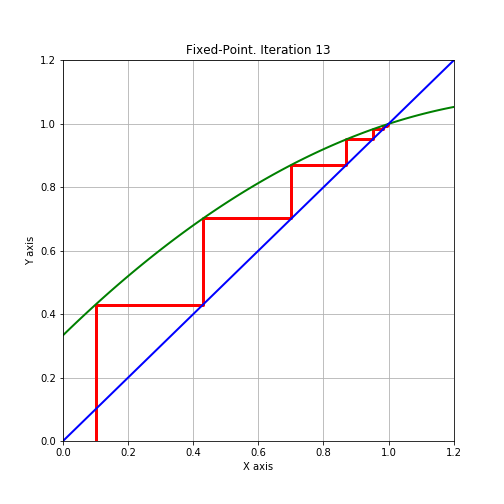
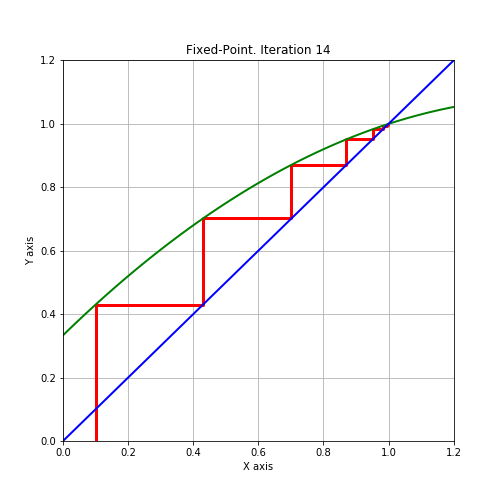

In [6]:
def f1(x):
    return (x**2-1)/3.0
FixedPoint_Animation( f1, pini = 0.1, Nmax = 15, xmin = 0, xmax = 1.2 )

Result: 0.7387845105929659



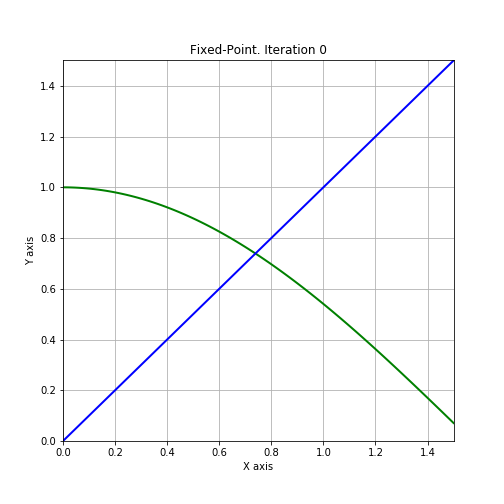
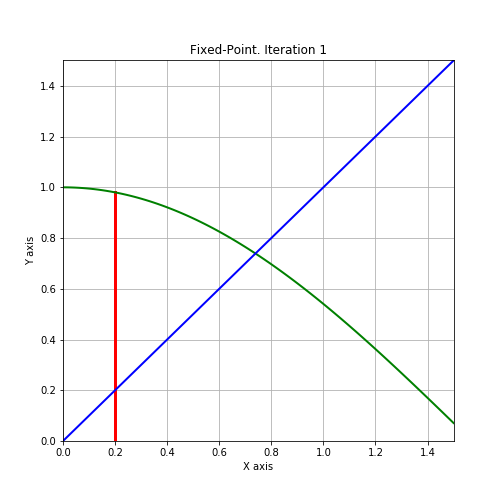
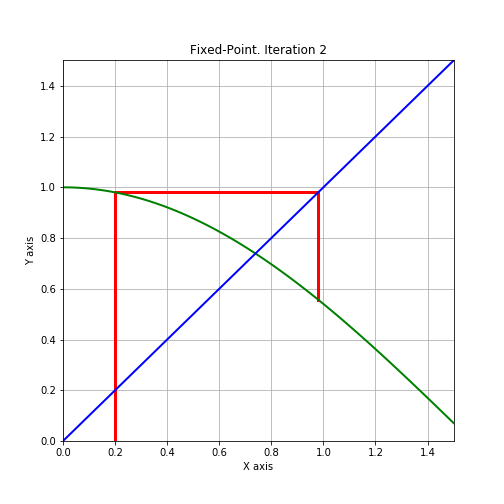
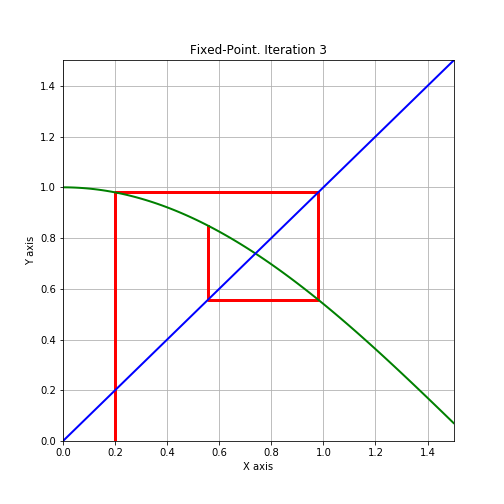
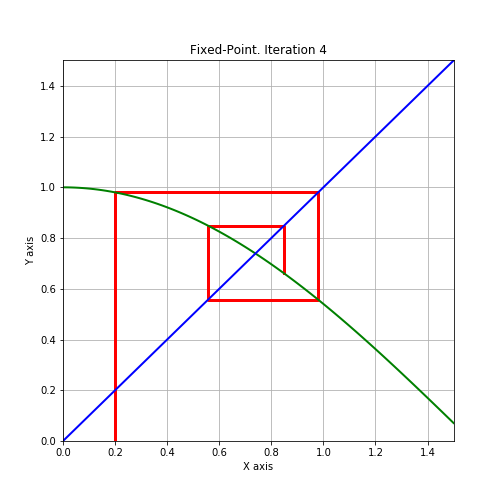
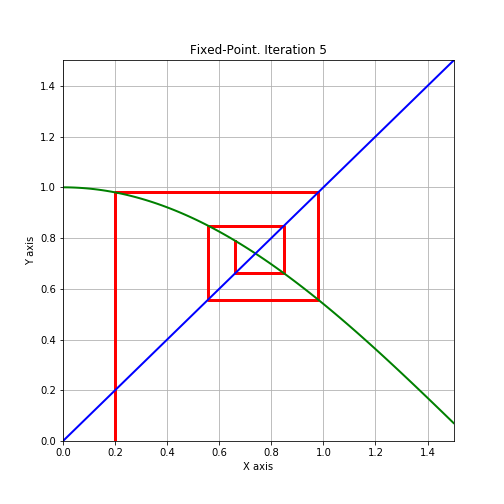
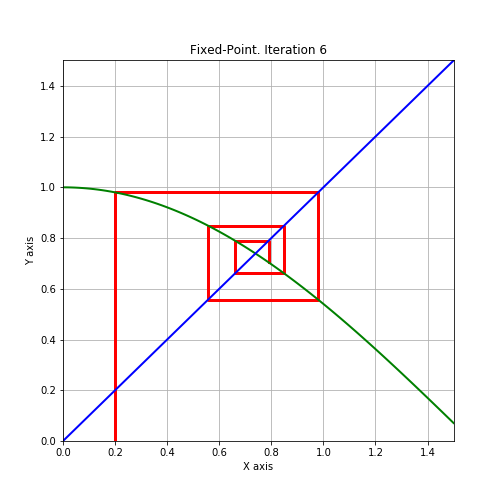
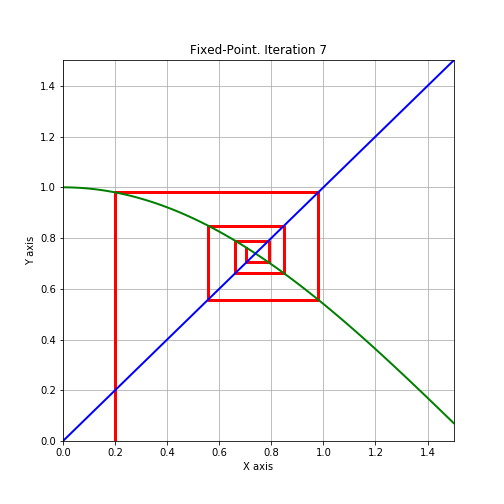
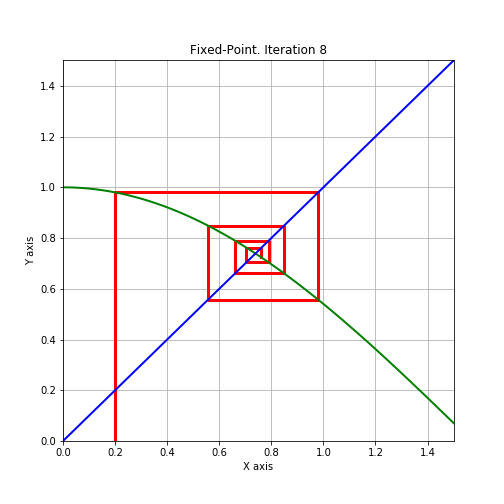
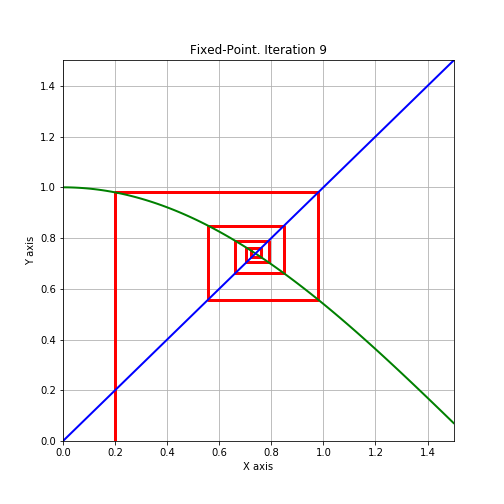
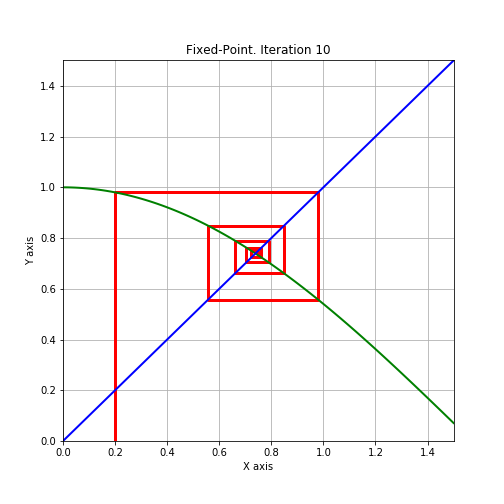
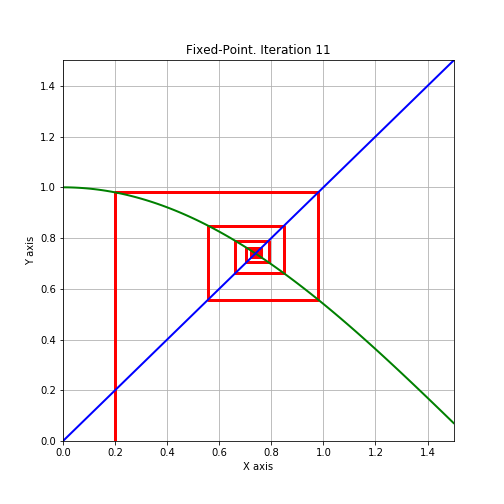
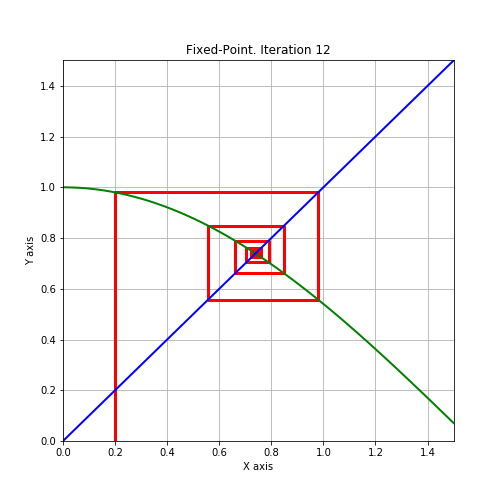
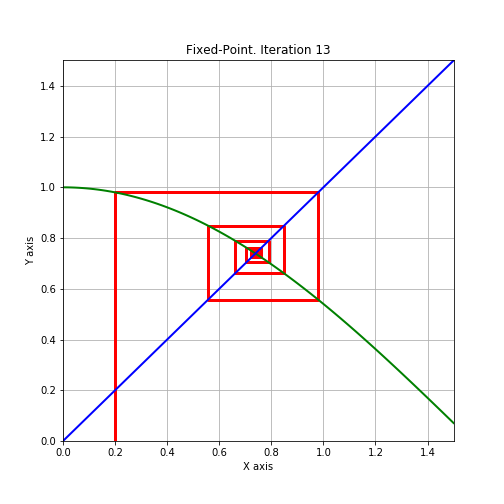
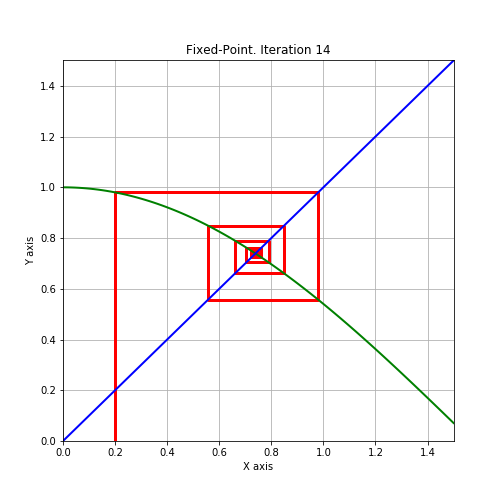

In [7]:
def f2(x):
    return x-np.cos(x)
FixedPoint_Animation( f2, pini = 0.2, Nmax = 15, xmin = 0, xmax = 1.5 )